In [126]:
# Import external script
%run models.py

# Import libraries
from sklearn.model_selection import train_test_split as tts

# Import data from CSV
fdata = pd.read_csv('data_histories.csv', index_col="dp_folio")

pm = ProbModel()

In [198]:
# Clusterize between obese and non obese
obesity = {0:[1,2,3], 1:[4,5,6]}
ndata = pm.clusterize_discrete("AIMC", obesity, "obesity", fdata)

# Clusterize excercise features
ejer = {"A":"greatereq_than(2.5)", "B":"less_than(2.5)"}
ndata = pm.clusterize_continuous("ejer_act", ejer, "ejer0B", ndata)
ndata = pm.clusterize_continuous("ejer1", ejer, "ejer1B", ndata)
ndata = pm.clusterize_continuous("ejer5", ejer, "ejer5B", ndata)
ndata = pm.clusterize_continuous("ejer10", ejer, "ejer10B", ndata)
ndata = pm.clusterize_continuous("ejer20", ejer, "ejer20B", ndata)
ndata = pm.clusterize_continuous("ejer30", ejer, "ejer30B", ndata)

ndata = pm.group_list_of_variables(["ejer0B", "ejer1B"], "ejer0_1", ndata)
ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B"], "ejer0_5", ndata)
ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B"], "ejer0_10", ndata)
ndata = pm.group_list_of_variables(["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B"], "ejer0_20", ndata)

In [199]:
# Select relevant data
selected_class = "obesity"
filtered_features = ["ejer0B", "ejer1B", "ejer5B", "ejer10B", "ejer20B", "ejer0_1", "ejer0_5", "ejer0_10", "ejer0_20"]
sdata = ndata[filtered_features].join(ndata[selected_class])
sdata = sdata[(sdata.ejer20B != "N") & (sdata.ejer10B != "N") & (sdata.ejer5B != "N") & (sdata.ejer1B != "N") & (sdata.ejer0B != "N")]
sdata

,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer0_1,ejer0_5,ejer0_10,ejer0_20,obesity
dp_folio,,,,,,,,,,
1,B,B,B,B,B,BB,BBB,BBBB,BBBBB,1
2,B,B,A,A,A,BB,BBA,BBAA,BBAAA,0
4,B,B,A,A,A,BB,BBA,BBAA,BBAAA,1
5,B,B,B,B,B,BB,BBB,BBBB,BBBBB,0
6,A,B,B,B,B,AB,ABB,ABBB,ABBBB,0
...,...,...,...,...,...,...,...,...,...,...
1076,B,B,B,A,A,BB,BBB,BBBA,BBBAA,1
1077,A,A,B,B,B,AA,AAB,AABB,AABBB,0
1078,B,A,A,A,A,BA,BAA,BAAA,BAAAA,0


In [200]:
# Split the data between training and test (2/3 for training and 1/3 for testing)
X = sdata[filtered_features]
Y = sdata[selected_class]
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.333)

print(X_train.shape)
print(X_test.shape)
data_train_raw = X_train.join(Y_train)
data_test_raw = X_test.join(Y_test)
data_train_raw.head()

(626, 9)
(313, 9)


,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer0_1,ejer0_5,ejer0_10,ejer0_20,obesity
dp_folio,,,,,,,,,,
160,A,A,A,B,B,AA,AAA,AAAB,AAABB,0
952,B,B,A,A,A,BB,BBA,BBAA,BBAAA,0
418,A,A,A,B,B,AA,AAA,AAAB,AAABB,0
119,B,B,B,A,B,BB,BBB,BBBA,BBBAB,1
129,B,B,B,A,A,BB,BBB,BBBA,BBBAA,0


### Preselection of data

In [201]:
options_low_noise = ["AAAAA","BBBBB", "BBAAA", "BBBAA", "BAAAA", "BBBBA", "AAAAB"]
# options = np.array(pm.string_generator("", ["A", "B"], 5)).flatten()

data_train = data_train_raw[data_train_raw["ejer0_20"].isin(options_low_noise)]
data_test = data_test_raw[data_test_raw["ejer0_20"].isin(options_low_noise)]
data_test

,ejer0B,ejer1B,ejer5B,ejer10B,ejer20B,ejer0_1,ejer0_5,ejer0_10,ejer0_20,obesity
dp_folio,,,,,,,,,,
895,A,A,A,A,A,AA,AAA,AAAA,AAAAA,0
348,B,A,A,A,A,BA,BAA,BAAA,BAAAA,0
810,B,B,B,A,A,BB,BBB,BBBA,BBBAA,0
755,A,A,A,A,A,AA,AAA,AAAA,AAAAA,0
981,B,A,A,A,A,BA,BAA,BAAA,BAAAA,0
...,...,...,...,...,...,...,...,...,...,...
662,A,A,A,A,B,AA,AAA,AAAA,AAAAB,1
991,B,B,B,B,A,BB,BBB,BBBB,BBBBA,0
826,B,B,B,B,B,BB,BBB,BBBB,BBBBB,1


### GNB and NBA

In [202]:
# Queries for NBA
queries_nba = {"ejer0B": ["A", "B"],
               "ejer1B": ["A", "B"],
               "ejer5B": ["A", "B"],
               "ejer10B": ["A", "B"],
               "ejer20B": ["A", "B"]
              }

# Queries for GNB
buf = np.array(pm.string_generator("", ["A", "B"], 5)).flatten()
hist_posibilities = pm.string_padding("", buf, "")

queries_gnb = { "ejer0_20": hist_posibilities }

In [203]:
# Define models and predict
gnb = NB()
gnb.train(queries_gnb, "obesity", 1, data_train)
gnb.predict(data_test)
Y_prob_gnb = gnb.predicted_scores

nba = NB()
nba.train(queries_nba, "obesity", 1, data_train)
nba.predict(data_test)
Y_prob_nba = nba.predicted_scores

In [183]:
gnb.predicted_scores

,ejer0_20,total_score
dp_folio,,
75,-0.713981,-0.713981
832,0.790096,0.790096
38,0.179837,0.179837
646,0.179837,0.179837
565,0.0903915,0.090392
...,...,...
196,0.179837,0.179837
37,0.0903915,0.090392
243,0.0722563,0.072256


### ROC Curve

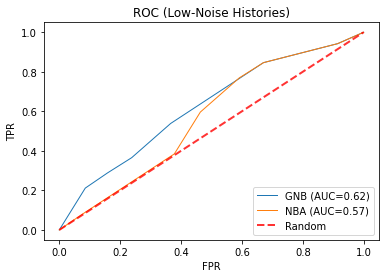

In [204]:
fpr1, tpr1, thresholds1 = roc_curve(data_test["obesity"].values, Y_prob_gnb.values[:, -1])
fpr2, tpr2, thresholds2 = roc_curve(data_test["obesity"].values, Y_prob_nba.values[:, -1])
roc_auc_gnb = auc(fpr1, tpr1)
roc_auc_nba = auc(fpr2, tpr2)
plt.plot(fpr1, tpr1, lw=1, alpha=1.0, label="GNB (AUC=%0.2f)" % (roc_auc_gnb))
plt.plot(fpr2, tpr2, lw=1, alpha=1.0, label="NBA (AUC=%0.2f)" % (roc_auc_nba))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC (Low-Noise Histories)")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random', alpha=.8)
plt.legend(loc="lower right")
plt.show()

### Precision Recall Curve

In [205]:
from sklearn.metrics import precision_recall_curve

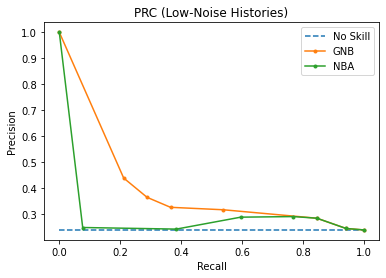

In [206]:
precision_gnb, recall_gnb, thresholds = precision_recall_curve(data_test["obesity"].values, Y_prob_gnb.values[:, -1])
precision_nba, recall_nba, thresholds = precision_recall_curve(data_test["obesity"].values, Y_prob_nba.values[:, -1])

prc_auc_gnb = auc(recall_gnb, precision_gnb)
prc_auc_nba = auc(recall_nba, precision_nba)

# plot the precision-recall curves
no_skill = len(data_test["obesity"].values[data_test["obesity"].values == 1]) / len(data_test["obesity"].values)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# plt.plot(recall_gnb, precision_gnb, marker='.', label="GNB (AUC=%0.2f)" % (prc_auc_gnb))
# plt.plot(recall_nba, precision_nba, marker='.', label="NBA (AUC=%0.2f)" % (prc_auc_nba))

plt.plot(recall_gnb, precision_gnb, marker='.', label="GNB")
plt.plot(recall_nba, precision_nba, marker='.', label="NBA")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title("PRC (Low-Noise Histories)")

# show the legend
plt.legend()
# show the plot
plt.show()

### Cross-Validation Models

In [207]:
vdata = sdata[sdata["ejer0_20"].isin(options_low_noise)]
vdata.shape

(643, 10)

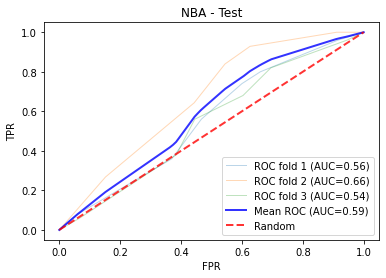

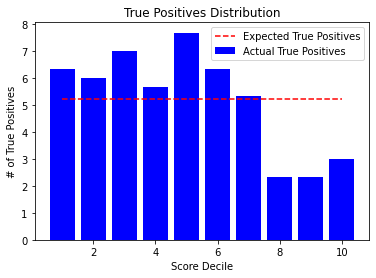

In [208]:
validation_nba = Validation(NB())
validation_nba.run_cv(vdata, queries_nba, "obesity", 1, 3, "NBA - Test")

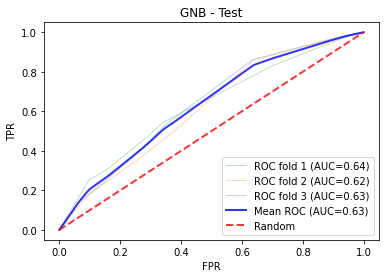

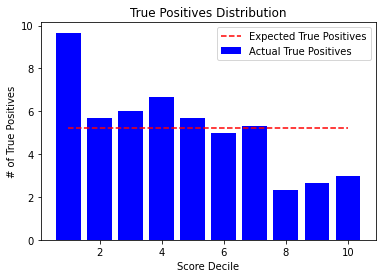

In [209]:
validation_gnb = Validation(NB())
validation_gnb.run_cv(vdata, queries_gnb, "obesity", 1, 3, "GNB - Test")

### Mixed Bayesian Model

In [ ]:
class MNB(BayesianModel):
    
    # Class constructor
    def __init__(self):
        # Low-Noise Features dictionary
        self.scores_dictionary_ln = {}
        self.scores_dictionary_ln_full = {}
        
        # High-Noise Features dictionary
        self.scores_dictionary_hn = {}
        self.scores_dictionary_hn_full = {}

        self.predicted_scores = {}
        self.queries = {}
        self.classFeature = ""
        self.classCategory = ""
    
    # Train the model, given certain query_features, a classFeature-classCategory and some training data Xt
    def train(self, queries, classFeature, classCategory, Xt):
        # Get the dictionary of scores, in relation to classFeature-classCategory
        self.queries = queries
        self.classFeature = classFeature
        self.classCategory = classCategory
        if type(self.queries) is dict:
            self.scores_dictionary = self.get_scores_from_featlist_and_catlist(self.queries, self.classFeature, self.classCategory, Xt)
            self.scores_dictionary_full = self.get_scores_from_featlist_and_catlist_full(self.queries, self.classFeature, self.classCategory, Xt)
        elif type(self.queries) is list:
            self.scores_dictionary = self.get_scores_from_featlist(self.queries, self.classFeature, self.classCategory, Xt)
            self.scores_dictionary_full = self.get_scores_from_featlist_full(self.queries, self.classFeature, self.classCategory, Xt)
    
    # Use the scores dictionary of the already trained model to classify the test data Xv
    def predict(self, Xv):

        # Use the dictionary of scores to calculate the associated sum of scores for every user
        if type(self.queries) is dict:
            user_scores = self.get_scores_from_featlist_and_catlist_per_user(self.queries, self.scores_dictionary, Xv)
        elif type(self.queries) is list:
            user_scores = self.get_scores_from_featlist_per_user(self.queries, self.scores_dictionary, Xv)
        
        # Store all the score-related information in a dataframe
        sum_scores = pd.DataFrame(user_scores.sum(axis=1))
        user_scores = user_scores.join(sum_scores)
        user_scores = user_scores.rename(columns={0: "total_score"})
        self.predicted_scores = user_scores.copy()
    
    # Use the scores dictionary of the already trained model to predict the scores of the test data Xv
    def get_predicted_scores(self):
        # Return the predicted scores from the self.predicted_scores table
        return pd.DataFrame(self.predicted_scores["total_score"])
    
    # Use the scores dictionary of the already trained model to perform a classification of the test data Xv
    def get_predicted_labels(self, threshold):
        # Evaluate whether the total_score > threshold. Classify as 1 if total_score > 0, or 0 if total_score <= 0
        labels = pd.DataFrame(self.get_predicted_scores() > threshold).replace(True, 1).replace(False, 0)
        
        label_name = "predicted_" + self.classFeature
        return labels.rename(columns={"total_score": label_name})